In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
forest_data=pd.read_csv('forestfires (1).csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Initial investigation

In [4]:
forest_data.shape

(517, 31)

In [5]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

The dataset contains 31 features and 517 records

the datatype for the features is assigned correctly

There is no null values in the dataset

### Data visualization

<AxesSubplot:xlabel='size_category', ylabel='count'>

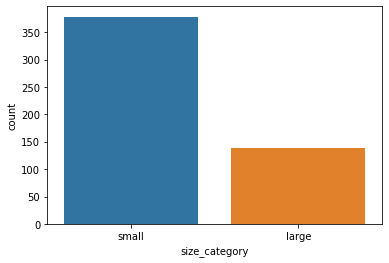

In [13]:
sns.countplot(x='size_category',data=forest_data)

<AxesSubplot:>

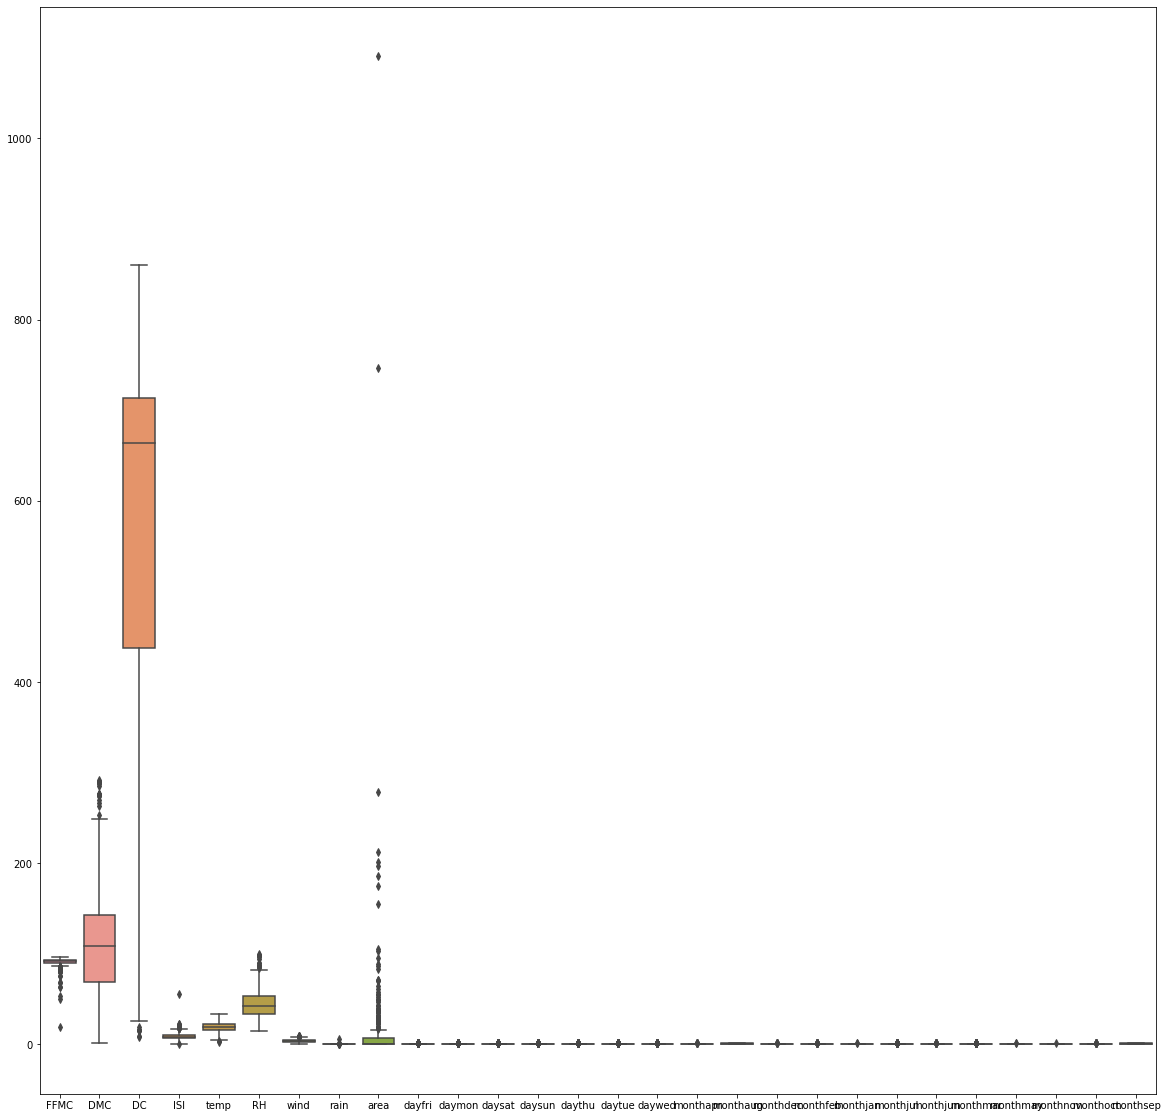

In [12]:
plt.figure(figsize=(20,20))
sns.boxplot(data=forest_data)

### Data preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
forest_data['size_category']=le.fit_transform(forest_data['size_category'])
forest_data['month']=le.fit_transform(forest_data['month'])
forest_data['day']=le.fit_transform(forest_data['day'])

In [13]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


### Model building

In [27]:
from sklearn.model_selection import train_test_split

In [23]:
x=forest_data.iloc[:,:-1]
y=forest_data['size_category']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((413, 30), (104, 30), (413,), (104,))

### Model training

In [30]:
from sklearn.svm import SVC

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,roc_auc_score,recall_score

### Linear kernal

accuracyscore is    :  0.99
precision is        :  0.988
AUc score is        :  0.978
recall value is     :  1.0
comfusion matrix:


<AxesSubplot:>

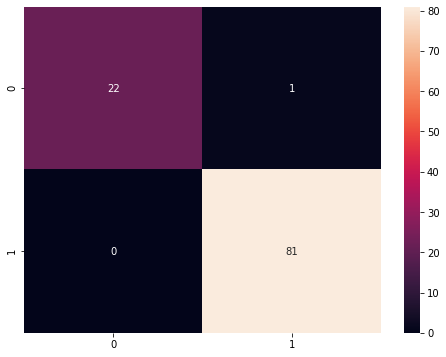

In [34]:
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(x_train,y_train)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

### Polynomial kernal

accuracyscore is    :  0.808
precision is        :  0.802
AUc score is        :  0.565
recall value is     :  1.0
comfusion matrix:


<AxesSubplot:>

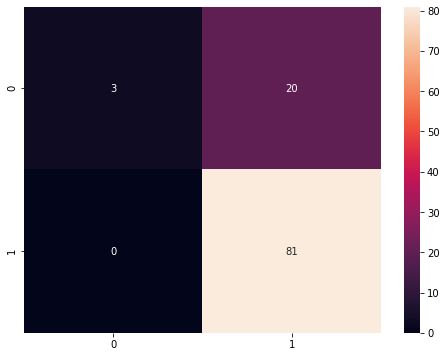

In [30]:
svc_classifier=SVC(kernel='poly')
svc_classifier.fit(x_train,y_train)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

### Sigmoidal kernal

accuracyscore is    :  0.74
precision is        :  0.781
AUc score is        :  0.506
recall value is     :  0.926
comfusion matrix:


<AxesSubplot:>

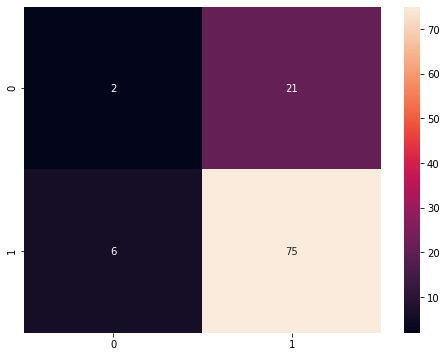

In [31]:
svc_classifier=SVC(kernel='sigmoid')
svc_classifier.fit(x_train,y_train)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)      

### Radial basis kernal

accuracyscore is    :  0.798
precision is        :  0.794
AUc score is        :  0.543
recall value is     :  1.0
comfusion matrix:


<AxesSubplot:>

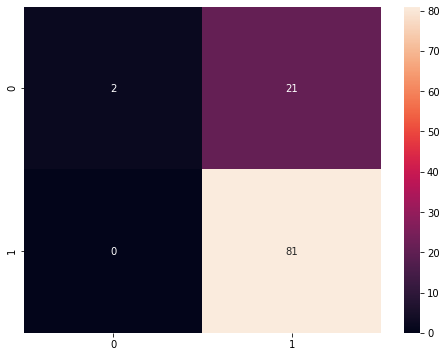

In [32]:
svc_classifier=SVC()
svc_classifier.fit(x_train,y_train)
y_pred_test=svc_classifier.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

Inference

The kernal linear gives better result compared to all other kernal

### Treating imbalanced dataset

In [14]:
!pip install imblearn

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote=SMOTE(sampling_strategy='minority')

In [24]:
x_sm,y_sm=smote.fit_resample(x,y)

In [25]:
x_sm.shape,y_sm.shape

((756, 30), (756,))

In [28]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2,stratify=y_sm)

accuracyscore is    :  1.0
precision is        :  1.0
AUc score is        :  1.0
recall value is     :  1.0
comfusion matrix:


<AxesSubplot:>

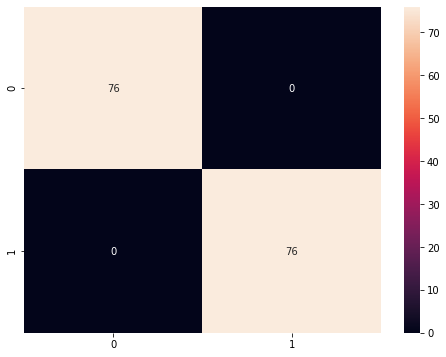

In [34]:
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(x_train_sm,y_train_sm)
y_pred_test=svc_classifier.predict(x_test_sm)

print('accuracyscore is    : ',round(accuracy_score(y_test_sm,y_pred_test),3))
print('precision is        : ',round(precision_score(y_test_sm,y_pred_test),3))
print('AUc score is        : ',round(roc_auc_score(y_test_sm,y_pred_test),3))
print('recall value is     : ',round(recall_score(y_test_sm,y_pred_test),3))

print('comfusion matrix:')

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test_sm,y_pred_test)
sns.heatmap(data = confu_matrix,
            annot=True)

Here after balancing the data by SMOTE, the accuracy of the model gets improved